<a href="https://colab.research.google.com/github/nfDaniel89/DataTwitterEleitoral/blob/main/Projeto_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando  e Instalando Bibliotecas

In [2]:
# pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.9 MB/s 


In [4]:
import snscrape.modules.twitter as sntwitter
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
import pandas as pd
import re
import matplotlib as plt
import seaborn as sns

## Coletando Dados (Tweets dos Candidatos)

In [8]:
maximo_tweets = 10000

  # Lula

In [9]:
lista_de_tweets_lula = []

In [11]:
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(['lula']).get_items()):
  if i > maximo_tweets:
    break
  lista_de_tweets_lula.append([tweet.date, tweet.id, tweet.content])

In [13]:
dataframe_tweets_lula = pd.DataFrame(lista_de_tweets_lula, columns=['Data_Hora', 'IdTweet', 'Tweet'])

In [14]:
dataframe_tweets_lula['Candidato'] = 'Lula'

# Bolsonaro

In [18]:
lista_de_tweets_bolsonaro = []

In [19]:
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(['Bolsonaro']).get_items()):
  if i > maximo_tweets:
    break
  lista_de_tweets_bolsonaro.append([tweet.date, tweet.id, tweet.content])

In [21]:
dataframe_tweets_bolsonaro = pd.DataFrame(lista_de_tweets_bolsonaro, columns=['Data_Hora', 'IdTweet', 'Tweet'])

In [22]:
dataframe_tweets_bolsonaro['Candidato'] = 'Bolsonaro'

# Felipe Dávila

In [23]:
lista_de_tweets_felipe = []

In [24]:
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(['Felipe Dávila']).get_items()):
  if i > maximo_tweets:
    break
  lista_de_tweets_felipe.append([tweet.date, tweet.id, tweet.content])

In [25]:
dataframe_tweets_felipe = pd.DataFrame(lista_de_tweets_felipe, columns=['Data_Hora', 'IdTweet', 'Tweet'])

In [26]:
dataframe_tweets_felipe['Candidato'] = 'Felipe Dávila'

# Criando um unico data frame

In [27]:
dataframe_candidatos = pd.concat([dataframe_tweets_lula, dataframe_tweets_bolsonaro, dataframe_tweets_felipe], axis = 0)

## Limpando Dados

In [30]:
dataframe_candidatos['Tweet_limpo'] = dataframe_candidatos['Tweet']

In [28]:
def limpeza_do_texto(tweet):
  tweet = tweet.lower()
  tweet = re.sub('\n', '', tweet )
  tweet = re.sub('@[^\s]+', '', tweet)
  tweet = re.sub('\B#\S+', '', tweet)
  tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
  return tweet

In [32]:
dataframe_candidatos['Tweet_limpo'] = dataframe_candidatos['Tweet'].apply(lambda i: limpeza_do_texto(i))

## Análise de Sentimentos

In [33]:
sid = SentimentIntensityAnalyzer()

In [34]:
dataframe_candidatos['Sentimento'] = dataframe_candidatos['Tweet_limpo'].apply(lambda i: sid.polarity_scores(' '.join(re.findall(r'\w+', i.lower()))))

In [36]:
dataframe_candidatos['Positivo'] = dataframe_candidatos['Sentimento'].apply(lambda i:i['pos'])
dataframe_candidatos['Negativo'] = dataframe_candidatos['Sentimento'].apply(lambda i:i['neg'])
dataframe_candidatos['Neutro'] = dataframe_candidatos['Sentimento'].apply(lambda i:i['neu'])
dataframe_candidatos['Composicao'] = dataframe_candidatos['Sentimento'].apply(lambda i:i['compound'])

In [37]:
sentimento = []

In [39]:
for i in dataframe_candidatos['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <= (-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')

In [40]:
dataframe_candidatos['Sentimento_Final'] = sentimento

## Criando o Data Frame Final

In [41]:
dataframe_final = dataframe_candidatos[['Data_Hora', 'IdTweet', 'Tweet', 'Candidato', 'Tweet_limpo', 'Sentimento_Final']]

## Visualisação dos dados

In [43]:
candidatos = dataframe_final.groupby('Candidato')

In [44]:
candidatos['Sentimento_Final'].value_counts()

Candidato      Sentimento_Final
Bolsonaro      Neutro              8003
               Negativo            1570
               Positivo             428
Felipe Dávila  Neutro              7798
               Negativo            1572
               Positivo             631
Lula           Neutro              7898
               Negativo            1631
               Positivo             472
Name: Sentimento_Final, dtype: int64

Text(0.5, 1.0, 'Contaem de Sentimentos')

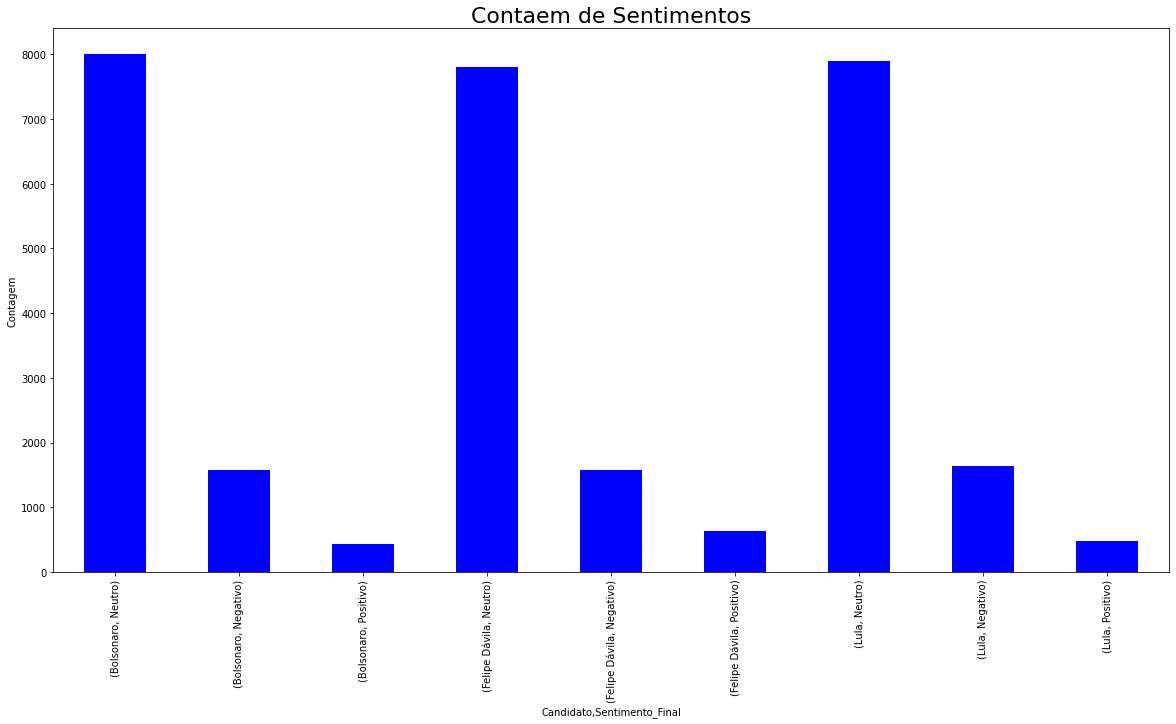

In [55]:
plt.rc('figure', figsize = (20, 10))
fig = candidatos['Sentimento_Final'].value_counts().plot.bar(color = 'blue')
fig.set_ylabel('Contagem')
fig.set_title('Contaem de Sentimentos', {'fontsize':22})